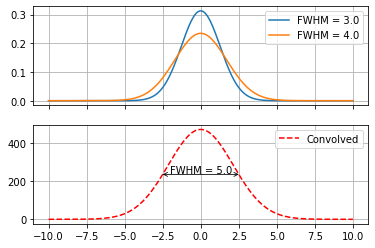

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define Gaussian and Lorentzian functions
def gauss(x, mu, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))



# Define x range
xs = np.linspace(-10, 10, 50000)

# Define Gaussian and Lorentzian distributions with different widths
g1 = gauss(xs, 0.0, 3)
g2 = gauss(xs, 0.0, 4)

# Perform convolution
conv = np.convolve(g1, g2, mode='same')

# Find maximum value of the convolved function
max_val = np.max(conv)

# Find positions where the function is half the maximum value
half_max_positions = xs[np.where(conv >= 0.5 * max_val)]

# Calculate FWHM as the distance between the two half-maximum positions
fwhm = half_max_positions[-1] - half_max_positions[0]

# Create plot with two subplots
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)

# Plot the Gaussian distributions on the first subplot
ax.plot(xs, g1, label="FWHM = 3.0")
ax.plot(xs, g2, label="FWHM = 4.0")

# Plot the convolved function on the second subplot
ax1.plot(xs, conv, 'r--', label="Convolved")

# Set axis grids
ax.grid()
ax1.grid()
ax.legend()
ax1.legend()
# Add FWHM text to the second subplot

arrow1 = ax1.annotate('', xy=(half_max_positions[0], 0.5*max_val), xytext=(half_max_positions[-1], 0.5*max_val),
                         arrowprops=dict(arrowstyle='<->', color='black', shrinkA=0, shrinkB=0, linewidth=0.8))
ax1.text(0, 0.5*max_val +5, f'FWHM = {fwhm:.1f}', ha='center')

fig.savefig("out/gausian_convolution")


In [2]:
print(np.sqrt(3**2 + 4**2))
def calc_fwhm(x, y):
    half_max = np.max(y) / 2
    idx_left = np.argmin(np.abs(y[:len(y)//2] - half_max))
    idx_right = np.argmin(np.abs(y[len(y)//2:] - half_max)) + len(y)//2
    return x[idx_right] - x[idx_left]

5.0


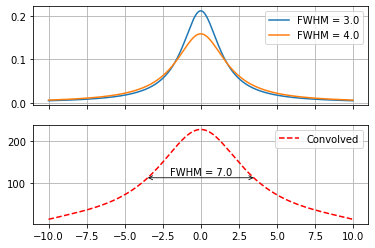

In [3]:
def lorenz(x, mu, fwhm):
    gamma = fwhm / 2
    return 1 / np.pi * gamma / ((x - mu)**2 + gamma**2)
# Define Gaussian and Lorentzian distributions with different widths
g1 = lorenz(xs, 0.0, 3)
g2 = lorenz(xs, 0.0, 4)

# Perform convolution
conv = np.convolve(g1, g2, mode='same')

# Find maximum value of the convolved function
max_val = np.max(conv)

# Find positions where the function is half the maximum value
half_max_positions = xs[np.where(conv >= 0.5 * max_val)]

# Calculate FWHM as the distance between the two half-maximum positions
fwhm = half_max_positions[-1] - half_max_positions[0]

# Create plot with two subplots
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)

# Plot the Gaussian distributions on the first subplot
ax.plot(xs, g1, label=f"FWHM = {calc_fwhm(xs, g1):.1f}")
ax.plot(xs, g2, label=f"FWHM = {calc_fwhm(xs, g2):.1f}")

# Plot the convolved function on the second subplot
ax1.plot(xs, conv, 'r--', label="Convolved")

# Set axis grids
ax.grid()
ax1.grid()
ax.legend()
ax1.legend()
# Add FWHM text to the second subplot

arrow1 = ax1.annotate('', xy=(half_max_positions[0], 0.5*max_val), xytext=(half_max_positions[-1], 0.5*max_val),
                      arrowprops=dict(arrowstyle='<->', color='black', shrinkA=0, shrinkB=0, linewidth=0.8))
ax1.text(0, 0.5*max_val +5, f'FWHM = {fwhm:.1f}', ha='center')

fig.savefig("out/lorenz_convolution")